In [181]:
dataset = pd.read_csv("dataset_concat.csv")

In [110]:
dataset = dataset[(dataset['Sort_Type']=='quick_sort') ]

In [111]:
dataset = dataset[(dataset['List_length']>10000)]

In [112]:
df_min = dataset
df_min['Runtimes'] =  df_min['Runtimes'] /7

In [113]:
df_min.head()

,Sort_Type,Data_Type_or_List_type,List_length,Runtimes,Number_of_repeatitions,Datetime
511,quick_sort,random,10240,0.020939,7,2019-10-31 17:20:05.174097
512,quick_sort,random,10240,0.017950,7,2019-10-31 17:20:05.174097
513,quick_sort,random,10240,0.019143,7,2019-10-31 17:20:05.174097
514,quick_sort,random,10240,0.021106,7,2019-10-31 17:20:05.174097
515,quick_sort,random,10240,0.018063,7,2019-10-31 17:20:05.174097


In [118]:
plot_data = pd.DataFrame( df_min.groupby(['List_length']).mean() )
plot_data['List_length'] = plot_data.index
plot_data['Runtimes'] = plot_data['Runtimes']*1000000000

In [203]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib as mpl

plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['text.usetex'] = False
def new_figure(height=55):
    "Return figure with width 84mm and given height in mm."
    return plt.figure(figsize=(84/10.16, height/10.16))

In [204]:
def time(xdata, c1 ):
    return  c1*xdata *np.log2( xdata )

# Guess the constant of 145
def guess(c):
    return [ 
        time(i,c) for i in  plot_this['List_length']
    ]

guess(145)

[19780398.835288756,
 42530397.67057751,
 90999995.34115502,
 193878390.68231004,
 411513581.3646201,
 870540762.7292402,
 1836108725.4584804,
 3862271850.9169607,
 8104652501.833921,
 16969522603.667843,
 35459480407.335686]

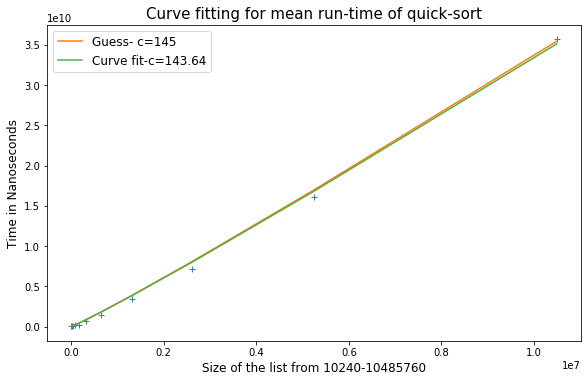

In [207]:
def time(xdata, c1 ):
    return  c1*xdata *np.log2( xdata )

# Guess the constant of 145
def guess(c):
    return [ 
        time(i,c) for i in  plot_this['List_length']
    ]
c_guess = 145 

fig=new_figure()
plt.plot(plot_this['List_length'], plot_this['Runtimes'], '+' )
plt.plot(plot_this['List_length'], guess(c_guess), label='Guess- c=145' )

from scipy.optimize import curve_fit

t = plot_this['Runtimes']
s = plot_this['List_length']
g = np.asarray( guess(c_guess) )
c, cov = curve_fit(time, xdata= s, ydata=t, p0= 145 )
c =  float("{0:.2f}".format(float(c)))

plt.plot(plot_this['List_length'], guess(c), label='Curve fit-c='+str(c) )

plt.xlabel('Size of the list from 10240-10485760')
plt.ylabel('Time in Nanoseconds')
plt.title("Curve fitting for mean run-time of quick-sort")
plt.legend()
plt.tight_layout()
plt.savefig("Curve fitting for mean run-time of quick-sort.pdf" , bbox_inches='tight')
plt.show()

In [206]:
from scipy.optimize import curve_fit

t = plot_this['Runtimes']
s = plot_this['List_length']
g = np.asarray( guess() )

c, cov = curve_fit(time, xdata= s, ydata=t, p0= 145 )
print(c)

TypeError: guess() missing 1 required positional argument: 'c'